# Produce Kippenhahn Plots for Soares-Furtado, Cantiello et al. 2020

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mkipp
import numpy as np
import mesa_reader as mr
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from Constants import Constants
c=Constants() 

/Users/mcantiello/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Constants defined...


In [2]:
###### Melinda's plt choices ###########
plt.rcParams['figure.figsize'] = (6,10)
plt.rc_fonts = {'figure.figsize': (15, 9.3)}
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
#plt.rcParams['axes.labelweight']='bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
plt.rcParams['axes.titlepad'] = 20 
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
#plt.text.usetex: True  # use latex for all text handling
##########################################

In [31]:


####################################################
# Plt Options from Perna, Lazzati & Cantiello 2017 #
####################################################
plt.rcParams['figure.figsize'] = (6,10)
plt.rc_fonts = {'figure.figsize': (15, 9.3)}
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['font.size'] = 20
plt.rcParams['legend.borderpad'] = 0.2
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
####################################################

In [3]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)

In [4]:
# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_hezams(logl,loglhe,model):
    zams=0
    while (loglhe[zams] < 0.90*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_time(star_age,model,val):
    ii=0
    while (star_age[ii] < val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

def compactness(mass,radius,value):
    i=0
    while (mass[i] > value):
     i=i+1
     compactness=value/(radius[i]*695.5)
    return compactness;

In [25]:
# READ MODEL DATA
directory='./LOGS_OLD'
h=mr.MesaData(directory+'/history.data')
model = h.model_number 
logl = h.log_L
logTeff=h.log_Teff
loglh=h.log_LH 
center_h1 = h.center_h1 
logt= h.log_Teff 
log_dt = h.log_dt
star_age = h.star_age
li7=h.surface_li7
n14=h.surface_n14
c1213=h.surface_c12/h.surface_c13
c12=h.surface_c12
c13=h.surface_c13
he3=h.surface_he3
zams=find_zams(logl,loglh,model)
myr=1e6
gyr=1e9
max_age=max(star_age)/gyr
print(max_age)

3.876303126496023


./LOGS ['./LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones
./LOGS ['./LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


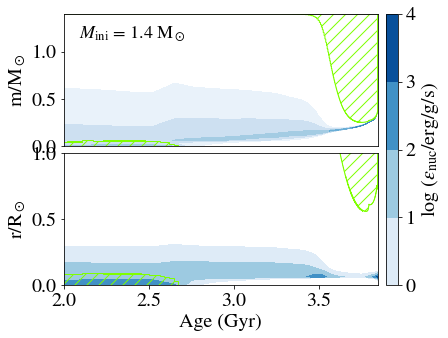

In [20]:
mod = '1.4'
gs1 = gridspec.GridSpec(2, 2,height_ratios=[1,1],width_ratios=[25,1])
gs1.update(wspace=0.05,hspace=0.05)
# Assign axis and remove xticks from top plot
#ax1 = plt.subplot(gs1[0,0])
ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[1,0])
ax3 = plt.subplot(gs1[:,1])

kipp_plot1 = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[directory],xaxis="star_age",time_units = "Gyr",yresolution=1000,core_masses=[],decorate_plot = False), axis = ax1)
ax1.set_xlim(2,max_age)
ax1.annotate(r'$M_{\rm ini}$ = '+mod+' M$_\odot$',(0.05,0.82),xycoords='axes fraction',fontsize=18)
#bar1 = plt.colorbar(kipp_plot1.contour_plot,pad=0.05)
#bar1.set_label(r"$\log$ [$\epsilon_{\rm nuc}$/erg/g/s]")

ax1.set_ylabel(r"m/M$_\odot$")


kipp_plot2 = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[directory],xaxis="star_age",time_units = "Gyr",yaxis="radius",yresolution=1000,core_masses=[],decorate_plot = False,show_over = False), axis = ax2)
ax2.set_xlim(2,max_age)
ax2.set_ylim(0,1)
#bar2 = plt.colorbar(kipp_plot2.contour_plot,pad=0.05)
#bar2.set_label(r"$\log$ [$\epsilon_{\rm nuc}$/erg/g/s]")

#ax2.annotate(r'M$_{\rm ini}$ = '+mod+' $M_\odot$',(0.05,0.85),xycoords='axes fraction')#,fontsize=5)
ax2.set_ylabel(r"r/R$_\odot$")

ax2.set_xlabel("Age (Gyr)")

bar2 = plt.colorbar(kipp_plot2.contour_plot,cax=ax3)
bar2.set_label(r"$\log$ ($\epsilon_{\rm nuc}$/erg/g/s)")

ax1.set_xticks([])

plt.savefig("kipp_2stack.pdf",bbox_inches='tight')

-1.1446633725164022


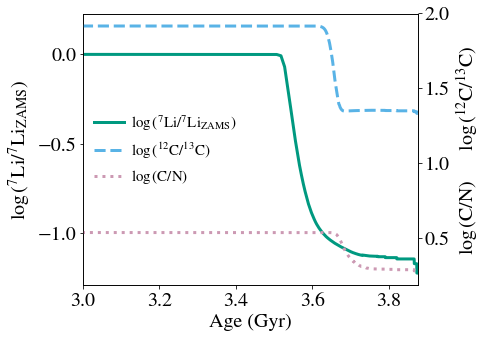

In [34]:
plt.rcParams['figure.figsize'] = (6,5)
fig = plt.figure()
axis = plt.gca()
print(np.log10(li7[1000]/li7[zams+10]))
ln1=plt.plot(star_age/gyr,np.log10(li7/li7[zams+10]),linewidth=3,color=BLUE_GREEN,label=r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")

#ln2=plt.plot(star_age/gyr,np.log10(he3/he3[0]),linewidth=3,color=ORANGE,label=r"$\log \, ( ^3$He/$^3$He$_{\rm ZAMS} )$")
#ln2=plt.plot(star_age/gyr,np.log10(he3/he3[0]),color=ORANGE)

#plt.plot(star_age/myr,np.log10(li7))
axisb = axis.twinx()
ln3=axisb.plot(star_age/gyr,np.log10(c1213),linewidth=3,linestyle='--',color=SKY_BLUE,label=r"$\log \, ( ^{12}$C/$^{13}$C$)$")
ln4=plt.plot(star_age/gyr,np.log10((c12+c13)/n14),linewidth=3,linestyle=':',color=RED_PURPLE,label=r"$\log \, ( $C/N$ )$")

lns =ln1+ln3+ln4 
labels = [l.get_label() for l in lns]
axisb.legend(lns, labels, loc='center left',fontsize=15, facecolor='white', fancybox=True,framealpha=0.99,handlelength=2,frameon=False)

axis.set_xlim(3,max_age)
#axisb.set_ylim(1.25,1.95)
axis.set_xlabel("Age (Gyr)")
#axis.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$             $\log \, ( ^3$He/$^3$He$_{\rm ZAMS} )$")
axis.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")

#axis.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")
axisb.set_ylabel(r"$\log \, ( $C/N$ )$      $\log \, ( ^{12}$C/$^{13}$C$)$")

plt.savefig("abundances.pdf",bbox_inches='tight')

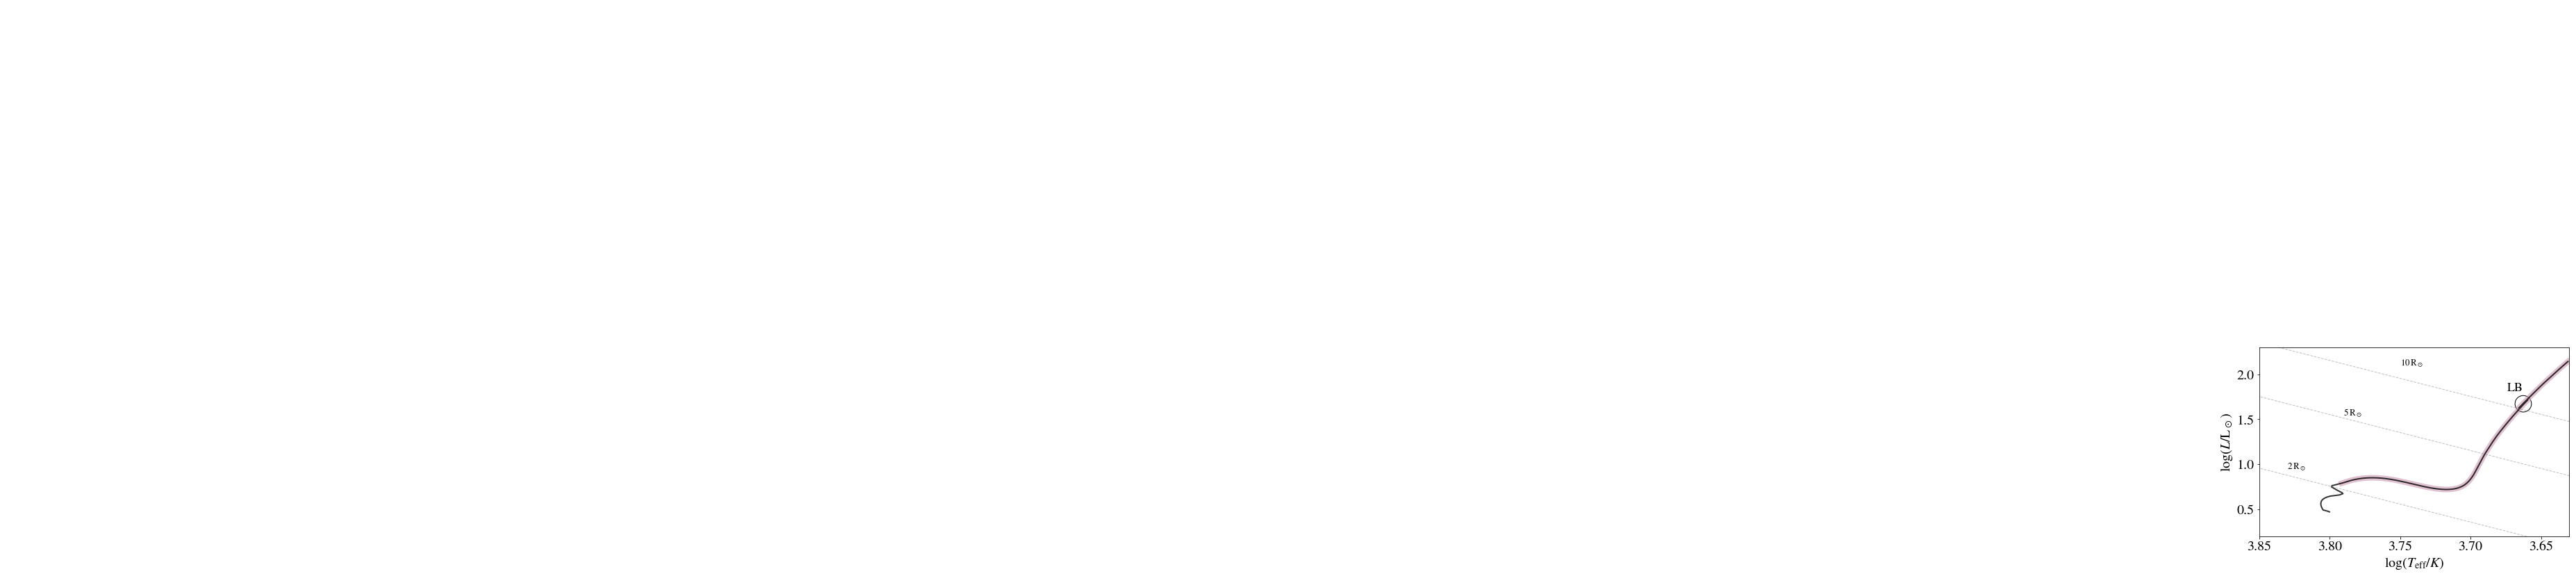

In [35]:
plt.rcParams['figure.figsize'] = (8,5)
fig = plt.figure()
axis = plt.gca()

tt=np.arange(3,5,0.01)
zams=find_zams(logl,loglh,model)
t1=find_time(star_age,model,3e9)
axis.plot(logTeff[t1:],logl[t1:],linewidth=8,color=RED_PURPLE,alpha=0.6)
axis.plot(logTeff[zams+5:],logl[zams+5:],linewidth=2,color=BLACK,alpha=0.8)

#axis.plot(tt,np.log10(const_radius_on_hrd(10**tt,1*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
axis.plot(tt,np.log10(const_radius_on_hrd(10**tt,2*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
axis.plot(tt,np.log10(const_radius_on_hrd(10**tt,5*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
axis.plot(tt,np.log10(const_radius_on_hrd(10**tt,10*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
#axis.plot(tt,np.log10(const_radius_on_hrd(10**tt,100*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
#axis.plot(tt,np.log10(const_radius_on_hrd(10**tt,1000*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)

axis.annotate(r"$2 \,\rm{R}_\odot$",(3.83,0.95),size=13)
axis.annotate(r"$5 \,\rm{R}_\odot$",(3.79,1.54),size=13)
axis.annotate(r"$10 \,\rm{R}_\odot$",(3.75,2.1),size=13)


axis.set_xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
axis.set_ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
axis.annotate(r"$1 \,\rm{R}_\odot$",(5.45,5.98),size=18)
axis.annotate(r"$10 \,\rm{R}_\odot$",(4.75,5.98),size=18)
axis.annotate(r"$10^2 \,\rm{R}_\odot$",(4.25,5.98),size=18)
axis.annotate(r"$10^3 \,\rm{R}_\odot$",(3.75,5.98),size=18)
axis.annotate("LB",(3.674,1.82),size=18)

circle1 = plt.Circle((0, 0), 0.2, color='r')
axis.add_artist(circle1)

#axis.scatter(3.6625,1.681,'o', mfc='none',color='black')
axis.scatter(3.6626,1.672,s=560,facecolors='none', edgecolors='black')

axis.set_xlim(3.85,3.63)
axis.set_ylim(0.2,2.3)
#axis2 = plt.axes([0,0,1,1])
#ip = InsetPosition(axis, [0.4,0.2,0.5,0.5])
#axis2.set_axes_locator(ip)
#axis2.plot(logTeff[t1:],logl[t1:],linewidth=8,color=RED_PURPLE,alpha=0.6)

#axis.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")

plt.savefig("hrd.pdf",bbox_inches='tight')

./LOGS_OLD ['./LOGS_OLD']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones
./LOGS_OLD ['./LOGS_OLD']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


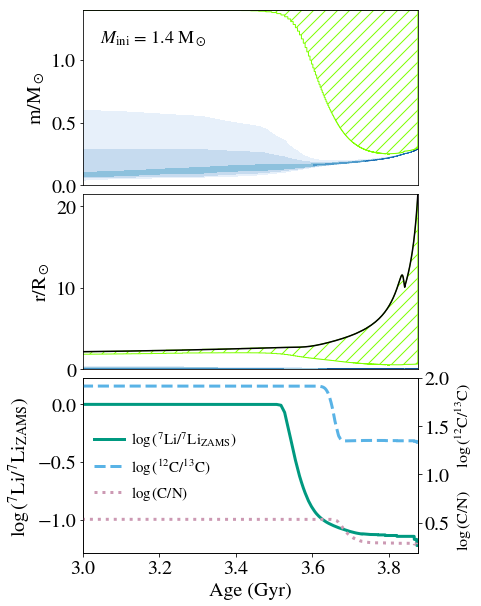

In [36]:
plt.rcParams['figure.figsize'] = (6,10)
#plt.style.use('/Users/mcantiello/.matplotlib/mesa.mplstyle')
mod = '1.4'

gs1 = gridspec.GridSpec(3, 1,height_ratios=[1,1,1])#,width_ratios=[25,1])
# No space between plots, e.g.: gs1.update(left=0.1, right=0.9, wspace=0.00,hspace=0.00)
gs1.update(wspace=0.05,hspace=0.05)
# Assign axis and remove xticks from top plot
#ax1 = plt.subplot(gs1[0,0])
ax1 = plt.subplot(gs1[0])
ax2 = plt.subplot(gs1[1])
ax3 = plt.subplot(gs1[2])

kipp_plot1 = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[directory],xaxis="star_age",time_units = "Gyr",yresolution=1000,core_masses=[],decorate_plot = False), axis = ax1)
ax1.set_xlim(3,max_age)
ax1.annotate(r'$M_{\rm ini}$ = '+mod+' M$_\odot$',(0.05,0.82),xycoords='axes fraction',fontsize=18)
#bar1 = plt.colorbar(kipp_plot1.contour_plot,pad=0.05)
#bar1.set_label(r"$\log$ [$\epsilon_{\rm nuc}$/erg/g/s]")

ax1.set_ylabel(r"m/M$_\odot$")


kipp_plot2 = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[directory],xaxis="star_age",time_units = "Gyr",yaxis="radius",yresolution=1000,core_masses=[],decorate_plot = False,show_over = False), axis = ax2)
ax2.set_xlim(3,max_age)
ax2.set_ylim(0,21.5)
#bar2 = plt.colorbar(kipp_plot2.contour_plot,pad=0.05)
#bar2.set_label(r"$\log$ [$\epsilon_{\rm nuc}$/erg/g/s]")

#ax2.annotate(r'M$_{\rm ini}$ = '+mod+' $M_\odot$',(0.05,0.85),xycoords='axes fraction')#,fontsize=5)
ax2.set_ylabel(r"r/R$_\odot$")









ln1=ax3.plot(star_age/gyr,np.log10(li7/li7[zams+10]),linewidth=3,color=BLUE_GREEN,label=r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")

#ln2=plt.plot(star_age/gyr,np.log10(he3/he3[0]),linewidth=3,color=ORANGE,label=r"$\log \, ( ^3$He/$^3$He$_{\rm ZAMS} )$")
#ln2=plt.plot(star_age/gyr,np.log10(he3/he3[0]),color=ORANGE)

#plt.plot(star_age/myr,np.log10(li7))
axisb = ax3.twinx()
ln3=axisb.plot(star_age/gyr,np.log10(c1213),linewidth=3,linestyle='--',color=SKY_BLUE,label=r"$\log \, ( ^{12}$C/$^{13}$C$)$")
ln4=axisb.plot(star_age/gyr,np.log10((c12+c13)/n14),linewidth=3,linestyle=':',color=RED_PURPLE,label=r"$\log \, ( $C/N$ )$")

lns =ln1+ln3+ln4 
labels = [l.get_label() for l in lns]
axisb.legend(lns, labels, loc='center left',fontsize=15, facecolor='white', fancybox=True,framealpha=0.99,handlelength=2,frameon=False)

ax3.set_xlim(3,max_age)
#axisb.set_ylim(1.25,1.95)
#axis.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$             $\log \, ( ^3$He/$^3$He$_{\rm ZAMS} )$")
ax3.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")

#axis.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")
axisb.set_ylabel(r"$\log \, ( $C/N$ )$      $\log \, ( ^{12}$C/$^{13}$C$)$")
axisb.yaxis.label.set_fontsize(16)



ax3.set_xlabel("Age (Gyr)")

#bar2 = plt.colorbar(kipp_plot2.contour_plot,cax=ax3)
#bar2.set_label(r"$\log$ ($\epsilon_{\rm nuc}$/erg/g/s)")

ax1.set_xticks([])
ax2.set_xticks([])

plt.savefig("kipp_3stack.pdf",bbox_inches='tight')

./LOGS_OLD ['./LOGS_OLD']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones
./LOGS_OLD ['./LOGS_OLD']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


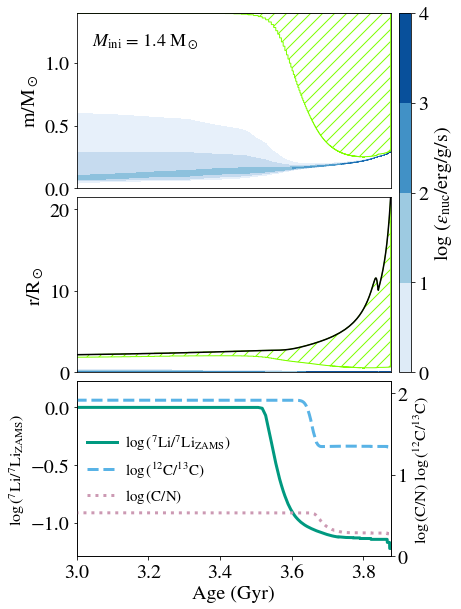

In [37]:
plt.rcParams['figure.figsize'] = (6,10)
#plt.style.use('/Users/mcantiello/.matplotlib/mesa.mplstyle')
mod = '1.4'

gs1 = gridspec.GridSpec(3, 2,height_ratios=[1,1,1],width_ratios=[25,1])
# No space between plots, e.g.: gs1.update(left=0.1, right=0.9, wspace=0.00,hspace=0.00)
gs1.update(wspace=0.05,hspace=0.05)
# Assign axis and remove xticks from top plot
#ax1 = plt.subplot(gs1[0,0])
ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[1,0])
ax3 = plt.subplot(gs1[2,0])
ax4 = plt.subplot(gs1[0:2,1])

kipp_plot1 = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[directory],xaxis="star_age",time_units = "Gyr",yresolution=1000,core_masses=[],decorate_plot = False), axis = ax1)
ax1.set_xlim(3,max_age)
ax1.annotate(r'$M_{\rm ini}$ = '+mod+' M$_\odot$',(0.05,0.82),xycoords='axes fraction',fontsize=18)
#bar1 = plt.colorbar(kipp_plot1.contour_plot,pad=0.05)
#bar1.set_label(r"$\log$ [$\epsilon_{\rm nuc}$/erg/g/s]")

ax1.set_ylabel(r"m/M$_\odot$")


kipp_plot2 = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[directory],xaxis="star_age",time_units = "Gyr",yaxis="radius",yresolution=1000,core_masses=[],decorate_plot = False,show_over = False), axis = ax2)
ax2.set_xlim(3,max_age)
ax2.set_ylim(0,21.5)
#bar2 = plt.colorbar(kipp_plot2.contour_plot,pad=0.05)
#bar2.set_label(r"$\log$ [$\epsilon_{\rm nuc}$/erg/g/s]")

#ax2.annotate(r'M$_{\rm ini}$ = '+mod+' $M_\odot$',(0.05,0.85),xycoords='axes fraction')#,fontsize=5)
ax2.set_ylabel(r"r/R$_\odot$")


ln1=ax3.plot(star_age/gyr,np.log10(li7/li7[zams+10]),linewidth=3,color=BLUE_GREEN,label=r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")

#ln2=plt.plot(star_age/gyr,np.log10(he3/he3[0]),linewidth=3,color=ORANGE,label=r"$\log \, ( ^3$He/$^3$He$_{\rm ZAMS} )$")
#ln2=plt.plot(star_age/gyr,np.log10(he3/he3[0]),color=ORANGE)

#plt.plot(star_age/myr,np.log10(li7))
axisb = ax3.twinx()
ln3=axisb.plot(star_age/gyr,np.log10(c1213),linewidth=3,linestyle='--',color=SKY_BLUE,label=r"$\log \, ( ^{12}$C/$^{13}$C$)$")
ln4=axisb.plot(star_age/gyr,np.log10((c12+c13)/n14),linewidth=3,linestyle=':',color=RED_PURPLE,label=r"$\log \, ( $C/N$ )$")

lns =ln1+ln3+ln4 
labels = [l.get_label() for l in lns]
axisb.legend(lns, labels, loc='center left',fontsize=15, facecolor='white', fancybox=True,framealpha=0.99,handlelength=2,frameon=False)

ax3.set_xlim(3,max_age)
axisb.set_ylim(0,2.15)
#axis.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$             $\log \, ( ^3$He/$^3$He$_{\rm ZAMS} )$")
ax3.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")

#axis.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")
axisb.set_ylabel(r"$\log \, ( $C/N$ )$ $\log \, ( ^{12}$C/$^{13}$C$)$")
axisb.yaxis.label.set_fontsize(16)
ax3.yaxis.label.set_fontsize(16)


bar2 = plt.colorbar(kipp_plot2.contour_plot,cax=ax4)
bar2.set_label(r"$\log$ ($\epsilon_{\rm nuc}$/erg/g/s)")

ax3.set_xlabel("Age (Gyr)")

#bar2 = plt.colorbar(kipp_plot2.contour_plot,cax=ax3)
#bar2.set_label(r"$\log$ ($\epsilon_{\rm nuc}$/erg/g/s)")

ax1.set_xticks([])
ax2.set_xticks([])

plt.savefig("kipp_3stack.pdf",bbox_inches='tight')

./LOGS_OLD ['./LOGS_OLD']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones
./LOGS_OLD ['./LOGS_OLD']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


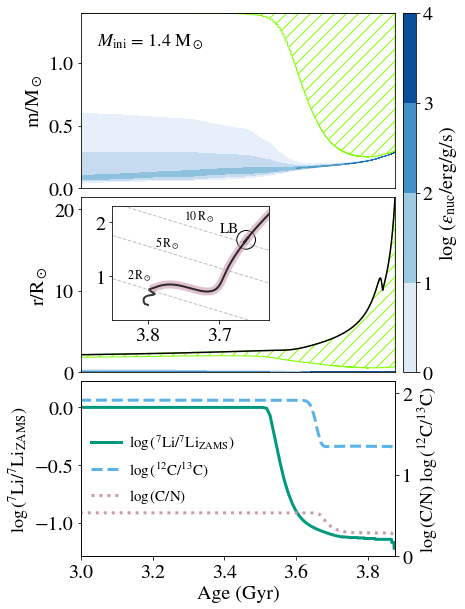

In [33]:
plt.rcParams['figure.figsize'] = (6,10)
mod = '1.4'
gs1 = gridspec.GridSpec(3, 2,height_ratios=[1,1,1],width_ratios=[25,1])
gs1.update(wspace=0.05,hspace=0.05)
# Assign axis - No xticks for top and middle plots
ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[1,0])
ax3 = plt.subplot(gs1[2,0])
ax4 = plt.subplot(gs1[0:2,1])
ax1.set_xticks([])
ax2.set_xticks([])

############### TOP PANEL ##############

kipp_plot1 = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[directory],xaxis="star_age",time_units = "Gyr",yresolution=1000,core_masses=[],decorate_plot = False), axis = ax1)
ax1.set_xlim(3,max_age)
ax1.set_ylim(0,1.4)
ax1.annotate(r'$M_{\rm ini}$ = '+mod+' M$_\odot$',(0.05,0.82),xycoords='axes fraction',fontsize=18)
ax1.set_ylabel(r"m/M$_\odot$")

############### MIDDLE PANEL ##############

kipp_plot2 = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[directory],xaxis="star_age",time_units = "Gyr",yaxis="radius",yresolution=1000,core_masses=[],decorate_plot = False,show_over = False), axis = ax2)
ax2.set_xlim(3,max_age)
ax2.set_ylim(0,21.5)
ax2.set_ylabel(r"r/R$_\odot$")

####### INSET PLOT (HRD) #######

axis2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax2, [0.1,0.3,0.5,0.65])
axis2.set_axes_locator(ip)

tt=np.arange(3,5,0.01)
zams=find_zams(logl,loglh,model)
t1=find_time(star_age,model,3e9)
axis2.plot(logTeff[t1:],logl[t1:],linewidth=8,color=RED_PURPLE,alpha=0.6)
axis2.plot(logTeff[zams+5:],logl[zams+5:],linewidth=2,color=BLACK,alpha=0.8)

# ADD LINES OF CONSTANT RADIUS
axis2.plot(tt,np.log10(const_radius_on_hrd(10**tt,2*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
axis2.plot(tt,np.log10(const_radius_on_hrd(10**tt,5*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
axis2.plot(tt,np.log10(const_radius_on_hrd(10**tt,10*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
axis2.annotate(r"$2 \,\rm{R}_\odot$",(3.83,0.95),size=12)
axis2.annotate(r"$5 \,\rm{R}_\odot$",(3.79,1.54),size=12)
axis2.annotate(r"$10 \,\rm{R}_\odot$",(3.75,2.05),size=12)

# ANNOTATE LUMINOSITY BUMP
axis2.annotate("LB",(3.7,1.82),size=15)
axis2.scatter(3.6626,1.672,s=350,facecolors='none', edgecolors='black')

axis2.set_xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
axis2.set_ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
axis2.xaxis.label.set_fontsize(12)
axis2.yaxis.label.set_fontsize(12)
axis2.set_xlabel(' ')
axis2.set_ylabel(' ')
axis2.set_xlim(3.85,3.63)
axis2.set_ylim(0.2,2.3)

################################

# ADD SIDE COLORBAR TO TOP AND MIDDLE PLOTS
bar2 = plt.colorbar(kipp_plot2.contour_plot,cax=ax4)
bar2.set_label(r"$\log$ ($\epsilon_{\rm nuc}$/erg/g/s)")

############### BOTTOM PANEL (SURFACE ABUNDANCES PLOT) ##############

ln1=ax3.plot(star_age/gyr,np.log10(li7/li7[zams+10]),linewidth=3,color=BLUE_GREEN,label=r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")
axisb = ax3.twinx()
ln3=axisb.plot(star_age/gyr,np.log10(c1213),linewidth=3,linestyle='--',color=SKY_BLUE,label=r"$\log \, ( ^{12}$C/$^{13}$C$)$")
ln4=axisb.plot(star_age/gyr,np.log10((c12+c13)/n14),linewidth=3,linestyle=':',color=RED_PURPLE,label=r"$\log \, ( $C/N$ )$")

lns =ln1+ln3+ln4 
labels = [l.get_label() for l in lns]
axisb.legend(lns, labels, loc='center left',fontsize=15, facecolor='white', fancybox=True,framealpha=0.99,handlelength=2,frameon=False)

ax3.set_xlim(3,max_age)
axisb.set_ylim(0,2.15)
ax3.set_ylabel(r"$\log \, ( ^7$Li/$^7$Li$_{\rm ZAMS} )$")
axisb.set_ylabel(r"$\log \, ( $C/N$ )$ $\log \, ( ^{12}$C/$^{13}$C$)$")
axisb.yaxis.label.set_fontsize(18)
ax3.yaxis.label.set_fontsize(18)
ax3.set_xlabel("Age (Gyr)")

############### SAVE FIGURE ###############
plt.savefig("kipp_3stack_hrd.pdf",bbox_inches='tight')

# Make Exoplanet Plot

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

import mesa_reader as mr

from Constants import Constants
from astropy.table import Table

#plotting
from matplotlib import rcParams
from matplotlib import rc
rc('text', usetex=True)

%matplotlib inline
import pylab as plot
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc #allows you to set rc parameters for plotting
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

plt.rc_fonts = {'figure.figsize': (15, 9.3)}
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 29
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
plt.rcParams['axes.titlepad'] = 20 
plt.rc('legend', borderpad=0.2, markerscale=10., fancybox=True)
#plt.text.usetex     : True  # use latex for all text handling
##########################################

In [39]:
filein='../exoplanets.csv'
df2 = pd.read_csv(filein,delimiter=',',names=['orbit','logg'],header=1)
df2[0:2]


,orbit,logg
0,0.137610,4.48
1,0.091351,4.14


In [40]:
filein='../PS_2020.01.08_16.26.33.csv'

In [41]:
df2 = pd.read_csv(filein,delimiter=',',names=['orbit','radius','logg'],header=1)
df2[0:3]

A=(np.where(df2.orbit<0.1))
B=(np.where(df2.logg<2))

C=list(set(A[0])&set(B[0]))

print(C)


print(df2.orbit[C],df2.logg[C])

[]
Series([], Name: orbit, dtype: float64) Series([], Name: logg, dtype: float64)


In [42]:
rsun_to_au = 0.00465047

models=['1.0','1.4','1.8']
color=['red','blue','green']
labels=[r'1.0 M$_{\odot}$',r'1.4 M$_{\odot}$',r'1.8 M$_{\odot}$']

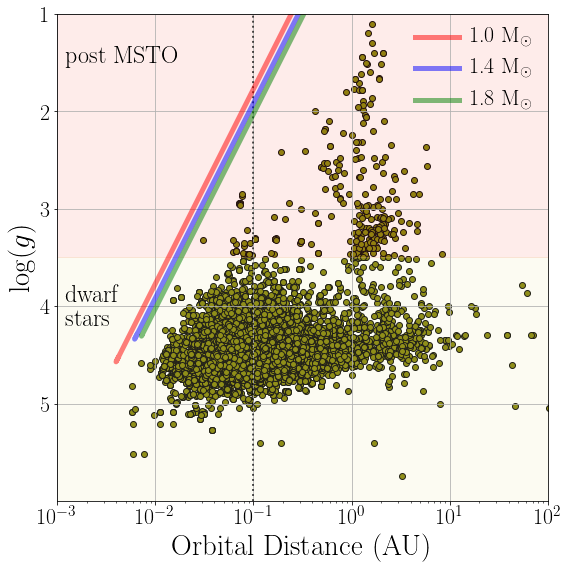

In [43]:
plt.figure(figsize=(8,8))
#plt.axvspan(1.0e-3, 0.1, alpha=0.15, color='orange')
plt.axhspan(1, 3.5, alpha=0.15, color='salmon')
plt.axhspan(3.5, 6, alpha=0.15, color='palegoldenrod')
plt.scatter(df2.orbit,df2.logg,color='olive',edgecolors='black',label='_nolegend_')
plt.axvline(x=0.1,linestyle='dotted',color='black',linewidth=1.9,alpha=0.7)
plt.yticks([5,4,3,2,1])
plt.grid()
plt.xlabel('Orbital Distance (AU)')
plt.ylabel('$\log(g)$')
plt.xlim(1.5E-3,50)
plt.ylim(5.6,1)
plt.xlim(1.0E-3,100)
plt.ylim(6,1)
plt.xscale('log')

i=0
for mods in models: 
    h=mr.MesaData('../'+mods+'/LOGS/history.data')
    log_g=h.log_g
    radius=10**(h.log_R)
    plt.plot(radius*rsun_to_au,log_g,linewidth=5,alpha=0.5,ls='-',color=color[i],label=labels[i])
    i=i+1
plt.legend(loc='upper right',fontsize=22, facecolor='white', fancybox=True,framealpha=0.99,handlelength=2,frameon=False)    

plt.annotate('post MSTO',(1.2e-3,1.5),fontsize=24,color='black')
plt.annotate('dwarf',(1.2e-3,3.95),fontsize=24,color='black')
plt.annotate('stars',(1.2e-3,4.2),fontsize=24,color='black')


outfile='planets_tracks.pdf'

msun=2e33
rsun=6.99e10
G=6.674e-8 
M=1.4*msun
RR=radius*rsun_to_au
#np.array(RR)
#print(RR)

#plt.plot(RR,np.log10(G*msun*3.0/(radius*rsun)**2))
#plt.plot(RR,np.log10(G*msun*1.5/(radius*rsun)**2))
#plt.plot(RR,np.log10(G*msun*1.0/(radius*rsun)**2))
#plt.plot(RR,np.log10(G*msun*2.0/(radius*rsun)**2))

#plt.plot(RR,np.log10(G*msun*0.9/(radius*rsun)**2))
plt.tight_layout(h_pad=1.0)
plt.savefig(outfile,bbox_inches='tight',format='pdf')

[0.00724609 0.00724603 0.00724959 ... 0.32784606 0.32785965 0.32788868]


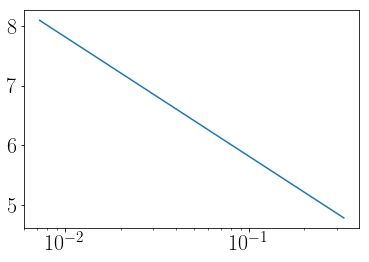

In [44]:
RR=radius*rsun_to_au
np.array(RR)
print(RR)
msun=6.99e10
G=6.67*1e-8 
M=1.4*msun

plt.plot(RR,np.log10(G*M/RR**2)) #G*M/
plt.xscale('log')
